In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


## Classification Example - MNIST

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# rescale the images from [0, 255] to the [0.0, 0.1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


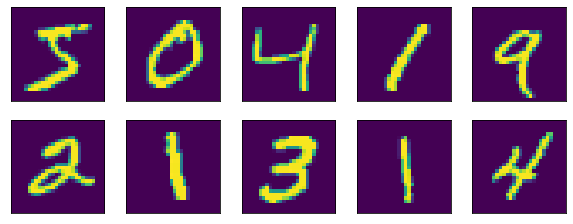

In [4]:
# check the first 10 examples

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
#     plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Modeling

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_history = model.fit(x_train, 
                             y_train, 
                             epochs=5,
                            validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3272 - accuracy: 0.9043 - val_loss: 0.1566 - val_accuracy: 0.9556
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1589 - accuracy: 0.9524 - val_loss: 0.1171 - val_accuracy: 0.9677
Epoch 3/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1196 - accuracy: 0.9651 - val_loss: 0.1092 - val_accuracy: 0.9682
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0957 - accuracy: 0.9712 - val_loss: 0.1001 - val_accuracy: 0.9718
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0823 - accuracy: 0.9748 - val_loss: 0.0947 - val_accuracy: 0.9730


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Evaluate returns the loss value and metrics values for the model.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0874 - accuracy: 0.9728


[0.0874328762292862, 0.9728000164031982]

Metrics like f1 score have been removed from Keras core. You need to calculate them manually. They removed them on 2.0 version. Those metrics are all global metrics, but Keras works in batches. 

In [8]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

157/157 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.94      0.99      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



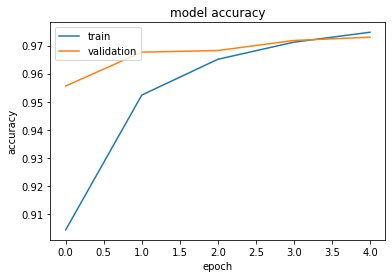

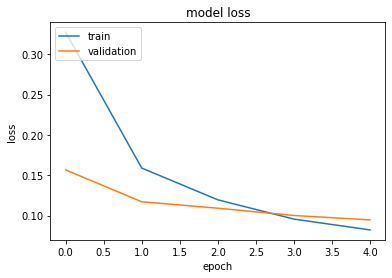

In [9]:
# summarize history for accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# CNN

In [22]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# rescale the images from [0, 255] to the [0.0, 0.1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

In [28]:
# reshape dataset to have a single channel

x_train_reshaped = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test_reshaped = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [27]:
x_train_reshaped.shape, x_train.shape

((60000, 28, 28, 1), (60000, 28, 28))

In [37]:
from tensorflow.keras.utils import to_categorical


# one hot encode target values
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [38]:
# Create the convolutional base

model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), 
                           activation='relu', 
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2))
])

model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


The output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

To complete our model, we need to feed the last output tensor from the convolutional base (of shape (11, 11, 64)) into one or more Dense layers to perform classification.
Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.

In [39]:
# flatten (or unroll) the 3D output to 1D
model_cnn.add(tf.keras.layers.Flatten())
# add one or more Dense layers on top
model_cnn.add(tf.keras.layers.Dense(100, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))


# model_cnn.add(layers.Dense(64, activation='relu'))
# model_cnn.add(layers.Dense(10))

model_cnn.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Compile and train the model
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_history_cnn = model_cnn.fit(x_train_reshaped, 
                             y_train, 
                             epochs=5,
                             validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0589 - val_accuracy: 0.9847
Epoch 2/5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0622 - val_accuracy: 0.9858
Epoch 3/5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0613 - val_accuracy: 0.9854
Epoch 4/5
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0782 - val_accuracy: 0.9837
Epoch 5/5
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0768 - val_accuracy: 0.9837


In [44]:
# Evaluate returns the loss value and metrics values for the model.
model_cnn.evaluate(x_test_reshaped, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0426 - accuracy: 0.9866


[0.04264596104621887, 0.9865999817848206]

In [48]:
y_pred_cnn = model_cnn.predict(x_test_reshaped, batch_size=64, 
                               verbose=1)
y_pred_bool_cnn = np.argmax(y_pred_cnn, axis=1)

print(classification_report(y_test, y_pred_bool_cnn))

157/157 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



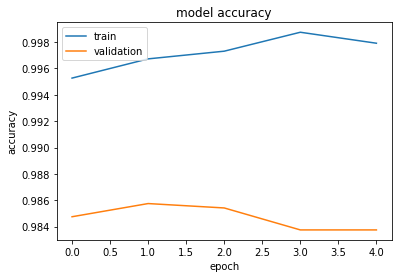

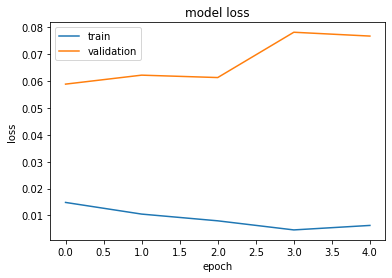

In [49]:
# summarize history for accuracy
plt.plot(training_history_cnn.history['accuracy'])
plt.plot(training_history_cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_history_cnn.history['loss'])
plt.plot(training_history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [53]:
sess = tf.compat.v1.Session() 


In [54]:
units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],
                                               order='F'),
                                  keep_prob:1.0})

NameError: name 'layer' is not defined

In [41]:
# visualize filters

In [42]:
# Transfer learning with CNN